# 导入工具包

In [1]:
import networkx as nx
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['simHei']
plt.rcParams['axes.unicode_minus']=False

# 导入数据集

In [2]:
G = nx.les_miserables_graph()

In [3]:
G.nodes

NodeView(('Napoleon', 'Myriel', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Valjean', 'Labarre', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Listolier', 'Tholomyes', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'MmeBurgon', 'Jondrette', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup'))

In [4]:
len(G)

77

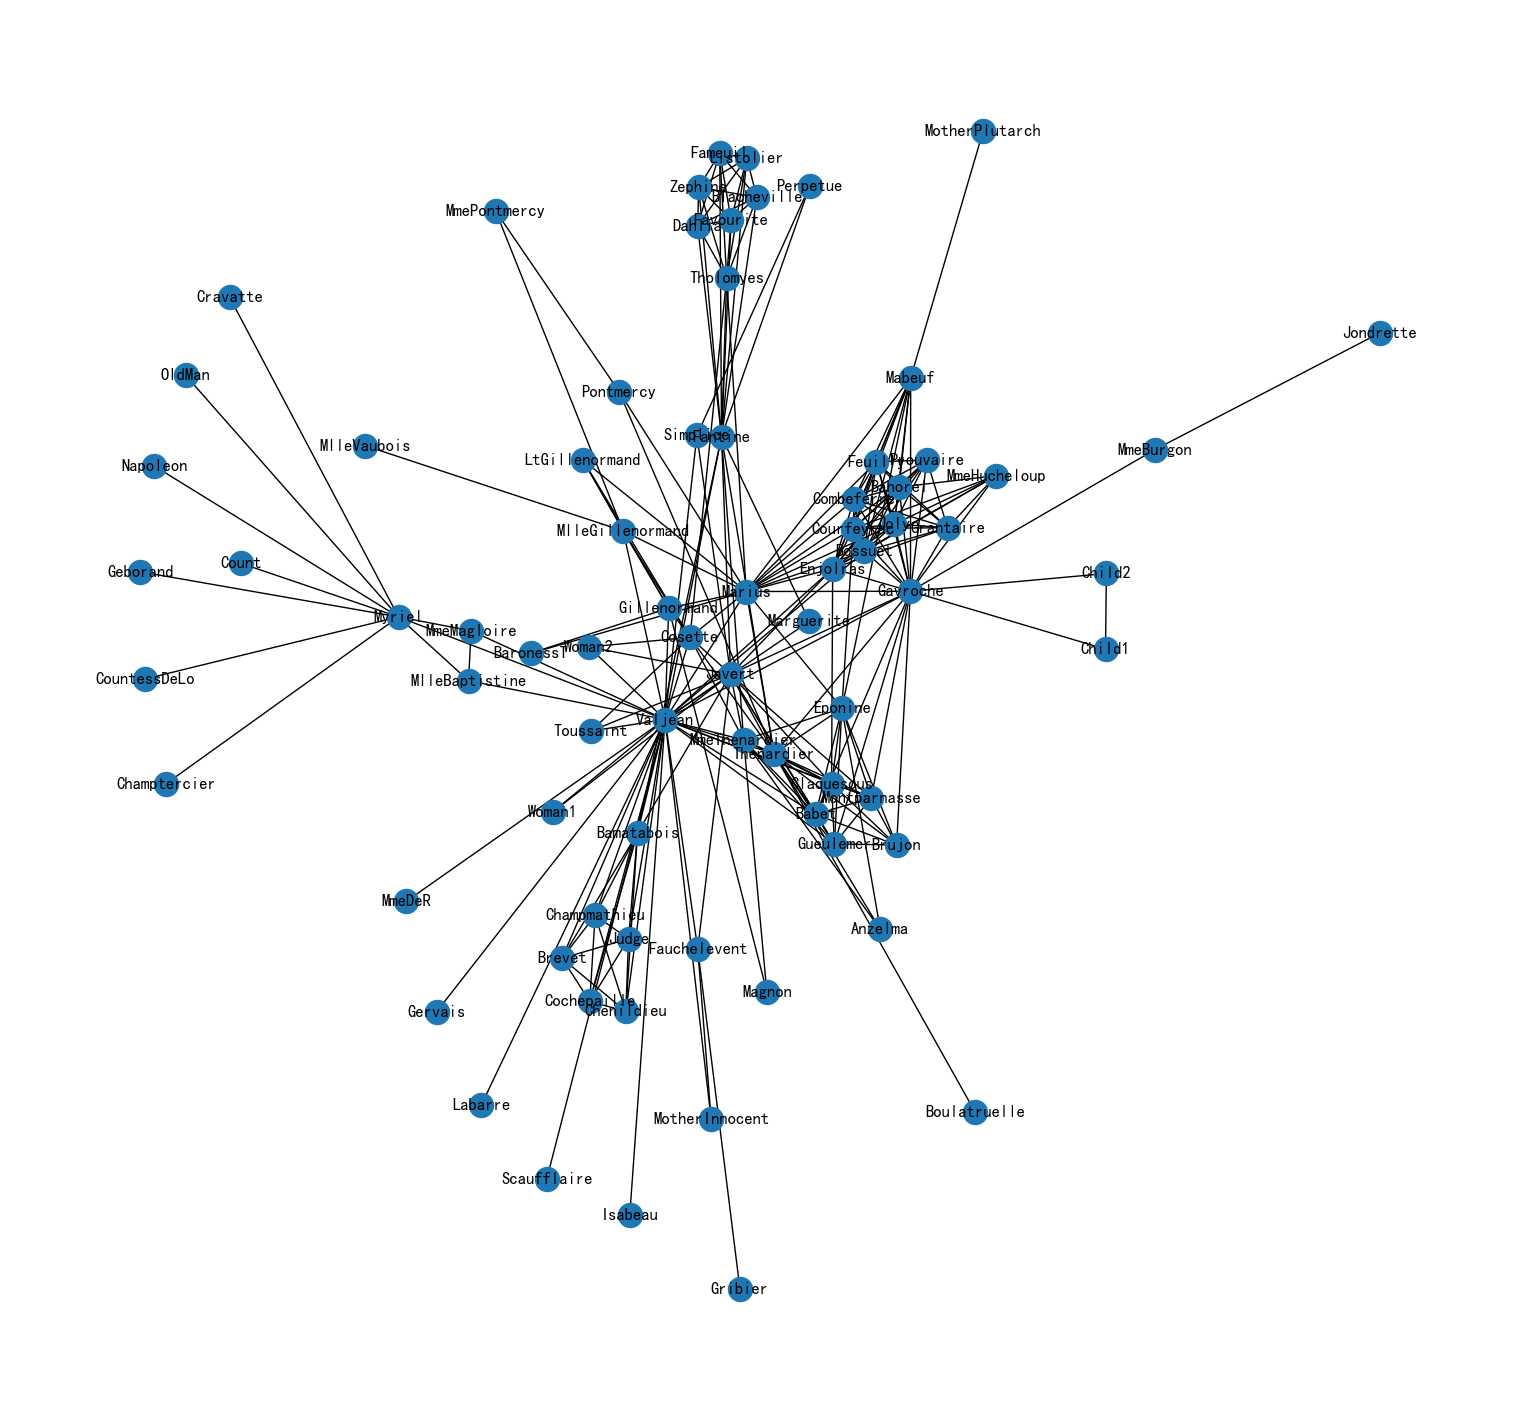

In [5]:
plt.figure(figsize=(15, 14))
pos = nx.spring_layout(G, seed=5)
nx.draw(G, pos, with_labels=True)
plt.show()

# 构建Node2Vec模型

In [7]:
from node2vec import Node2Vec

In [9]:
node2vec = Node2Vec(G,
                   dimensions=32,
                   p=2,
                   q=0.5,
                   walk_length=3,
                   num_walks=600,
                   workers=4)

# 训练
model = node2vec.fit(window=3,
                    min_count=1,
                    batch_words=4)
X = model.wv.vectors

Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]

In [11]:
X.shape

(77, 32)

# 节点Embedding聚类可视化
## 聚类

In [16]:
from sklearn.cluster import KMeans
import numpy as np
cluster_labels = KMeans(n_clusters=3, n_init='auto').fit(X).labels_
print(cluster_labels)

[2 1 2 2 2 2 0 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 0 0 0 2 0 2 0 2 2 0 0 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 1 2 2 2 0 2 2 2 2 2 1 1 1 1 1 2 0 1 2 2 2 2 2 2 2
 2 2 2]


C:\Users\Huanuo\Miniconda3\envs\hk_autogluon\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## 将networkx中的节点和词向量中的节点对应

In [17]:
colors = []
nodes = list(G.nodes)
for node in nodes:
    idx = model.wv.key_to_index[str(node)]
    colors.append(cluster_labels[idx])

## 可视化聚类

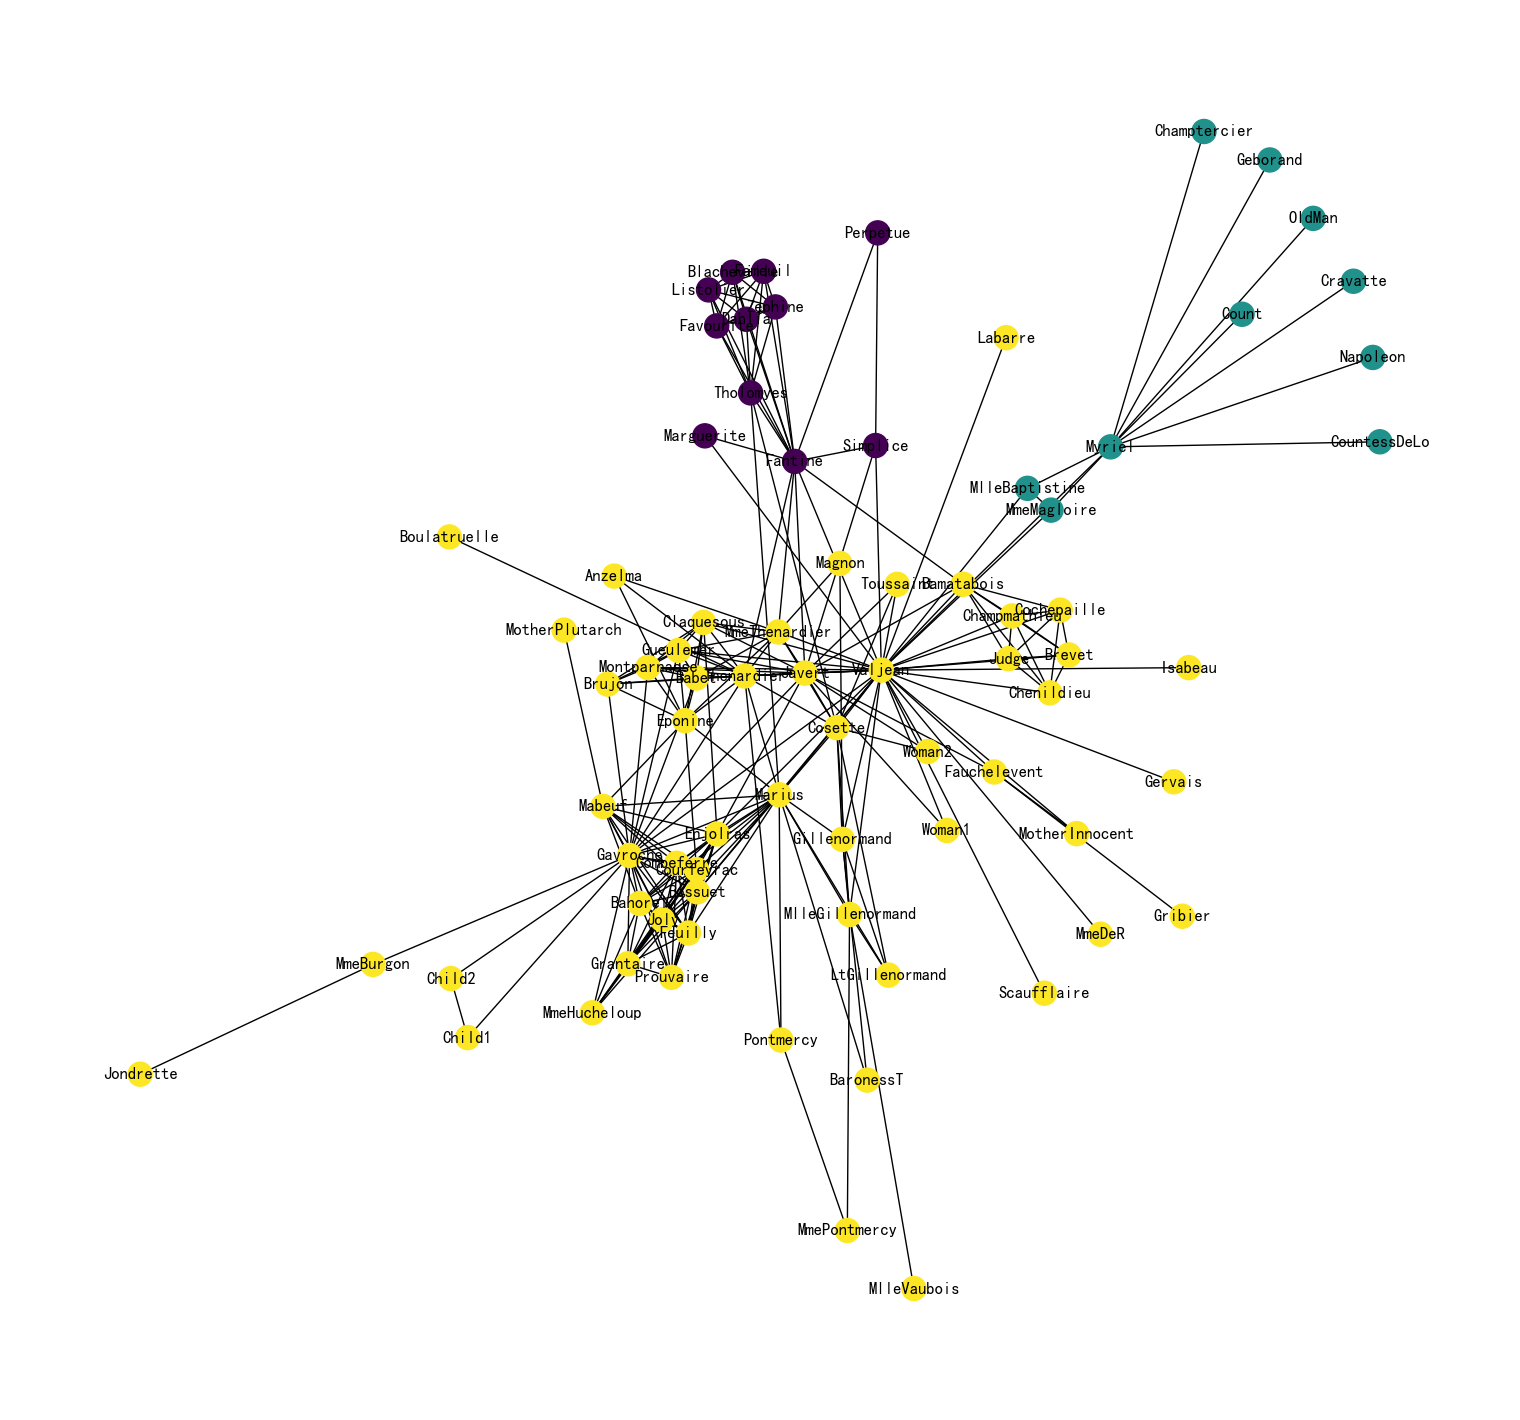

In [18]:
plt.figure(figsize=(15, 14))
pos = nx.spring_layout(G, seed=10)
nx.draw(G, pos, node_color=colors, with_labels=True)
plt.show()

## 节点Embedding将为可视化

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embed_2d = pca.fit_transform(X)

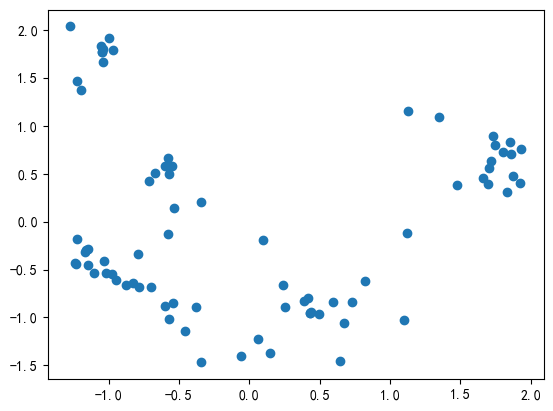

In [20]:
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])
plt.show()

## 查看Embedding

In [22]:
model.wv.get_vector('Napoleon').shape

(32,)

In [23]:
model.wv.get_vector('Napoleon')

array([ 0.21657403, -0.35531113,  0.67958504,  0.07176984, -0.09936985,
       -0.3760994 ,  0.74434334,  0.87744683, -0.5254415 ,  0.17482331,
       -0.23273669, -0.7822449 , -0.8114679 ,  0.27477992, -0.5701437 ,
        0.884637  ,  0.08819436,  0.2749428 , -0.20221394,  0.20185839,
        0.88789546,  1.0071999 ,  0.90193516,  0.15663832,  0.8371522 ,
       -0.5108957 , -0.8800688 ,  0.5227165 ,  0.2526356 , -0.42966336,
       -0.29042423, -0.25269273], dtype=float32)

In [24]:
model.wv.most_similar('Napoleon')

[('Count', 0.9971193671226501),
 ('OldMan', 0.9970054030418396),
 ('Geborand', 0.9963265657424927),
 ('CountessDeLo', 0.9960153102874756),
 ('Champtercier', 0.9957398176193237),
 ('Cravatte', 0.994116485118866),
 ('MmeMagloire', 0.9717578291893005),
 ('MlleBaptistine', 0.9584008455276489),
 ('Myriel', 0.8170039653778076),
 ('Labarre', 0.5069045424461365)]

In [26]:
model.wv.similar_by_word('Napoleon')

[('Count', 0.9971193671226501),
 ('OldMan', 0.9970054030418396),
 ('Geborand', 0.9963265657424927),
 ('CountessDeLo', 0.9960153102874756),
 ('Champtercier', 0.9957398176193237),
 ('Cravatte', 0.994116485118866),
 ('MmeMagloire', 0.9717578291893005),
 ('MlleBaptistine', 0.9584008455276489),
 ('Myriel', 0.8170039653778076),
 ('Labarre', 0.5069045424461365)]

In [28]:
model.wv.similarity('Napoleon', 'Champtercier')

0.9957397

## 对Edge(连接)做Embedding

In [29]:
from node2vec.edges import HadamardEmbedder

In [35]:
# Hadamard 两个embedding对应元素相乘
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

In [39]:
edges_embs[('Napoleon', 'Labarre')]

array([-0.11863742,  0.04204394, -0.17452726,  0.00974927,  0.00239138,
        0.10082801,  0.51429605,  0.1506821 ,  0.10759978,  0.03247353,
       -0.08389745,  0.35854203, -0.00979209,  0.03098316, -0.06685674,
       -0.1494234 ,  0.01699099,  0.08569344,  0.01525845,  0.02102861,
       -0.15272166,  0.93253785,  0.6659588 ,  0.07126244,  0.23750912,
        0.18469156,  0.2327566 , -0.13070273,  0.04208586,  0.11854797,
        0.07436402, -0.02913585], dtype=float32)

In [37]:
edges_kv = edges_embs.as_keyed_vectors()

Generating edge features: 100%|██████████████████████████████████████████████| 3003/3003.0 [00:00<00:00, 166836.59it/s]


In [42]:
edges_kv.index_to_key

["('Valjean', 'Valjean')",
 "('Myriel', 'Valjean')",
 "('Marius', 'Valjean')",
 "('Thenardier', 'Valjean')",
 "('Gavroche', 'Valjean')",
 "('Cosette', 'Valjean')",
 "('Fantine', 'Valjean')",
 "('Enjolras', 'Valjean')",
 "('Javert', 'Valjean')",
 "('Courfeyrac', 'Valjean')",
 "('MmeMagloire', 'Valjean')",
 "('MlleGillenormand', 'Valjean')",
 "('Gillenormand', 'Valjean')",
 "('MlleBaptistine', 'Valjean')",
 "('Bossuet', 'Valjean')",
 "('Combeferre', 'Valjean')",
 "('MmeThenardier', 'Valjean')",
 "('Fauchelevent', 'Valjean')",
 "('Babet', 'Valjean')",
 "('Bahorel', 'Valjean')",
 "('Gueulemer', 'Valjean')",
 "('Joly', 'Valjean')",
 "('Tholomyes', 'Valjean')",
 "('Favourite', 'Valjean')",
 "('Blacheville', 'Valjean')",
 "('Champmathieu', 'Valjean')",
 "('Valjean', 'Zephine')",
 "('Mabeuf', 'Valjean')",
 "('Dahlia', 'Valjean')",
 "('Judge', 'Valjean')",
 "('Eponine', 'Valjean')",
 "('Listolier', 'Valjean')",
 "('Fameuil', 'Valjean')",
 "('Feuilly', 'Valjean')",
 "('Claquesous', 'Valjean')",


In [43]:
edges_kv.most_similar(str(('Judge', 'Valjean')))

[("('Champmathieu', 'Valjean')", 0.9954836964607239),
 ("('Cochepaille', 'Valjean')", 0.9923914670944214),
 ("('Brevet', 'Valjean')", 0.9919911623001099),
 ("('Chenildieu', 'Valjean')", 0.9918885231018066),
 ("('Bamatabois', 'Valjean')", 0.9779617786407471),
 ("('Brevet', 'Toussaint')", 0.9426334500312805),
 ("('Judge', 'Toussaint')", 0.9416773915290833),
 ("('Chenildieu', 'Toussaint')", 0.9395269751548767),
 ("('Cochepaille', 'Toussaint')", 0.938973069190979),
 ("('Brevet', 'Woman2')", 0.9363399744033813)]